### Decision tree

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [4]:
ba=pd.read_csv("bank_authentication.csv")
ba.tail()

,Variance,Skewness,Curtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [20]:
## Future scaling 
x=ba.drop("Class",axis=1)
x
y=ba["Class"]
#y


In [22]:
dt=DecisionTreeRegressor()

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.2,random_state=1)
dt.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [29]:
y_predict=dt.predict(xtest)
y_predict

array([1., 0., 1., ..., 0., 1., 0.])

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(ytest,y_predict))
print(accuracy_score(ytest,y_predict))
print(classification_report(ytest,y_predict))

[[609   0]
 [  0 489]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       609
           1       1.00      1.00      1.00       489

    accuracy                           1.00      1098
   macro avg       1.00      1.00      1.00      1098
weighted avg       1.00      1.00      1.00      1098



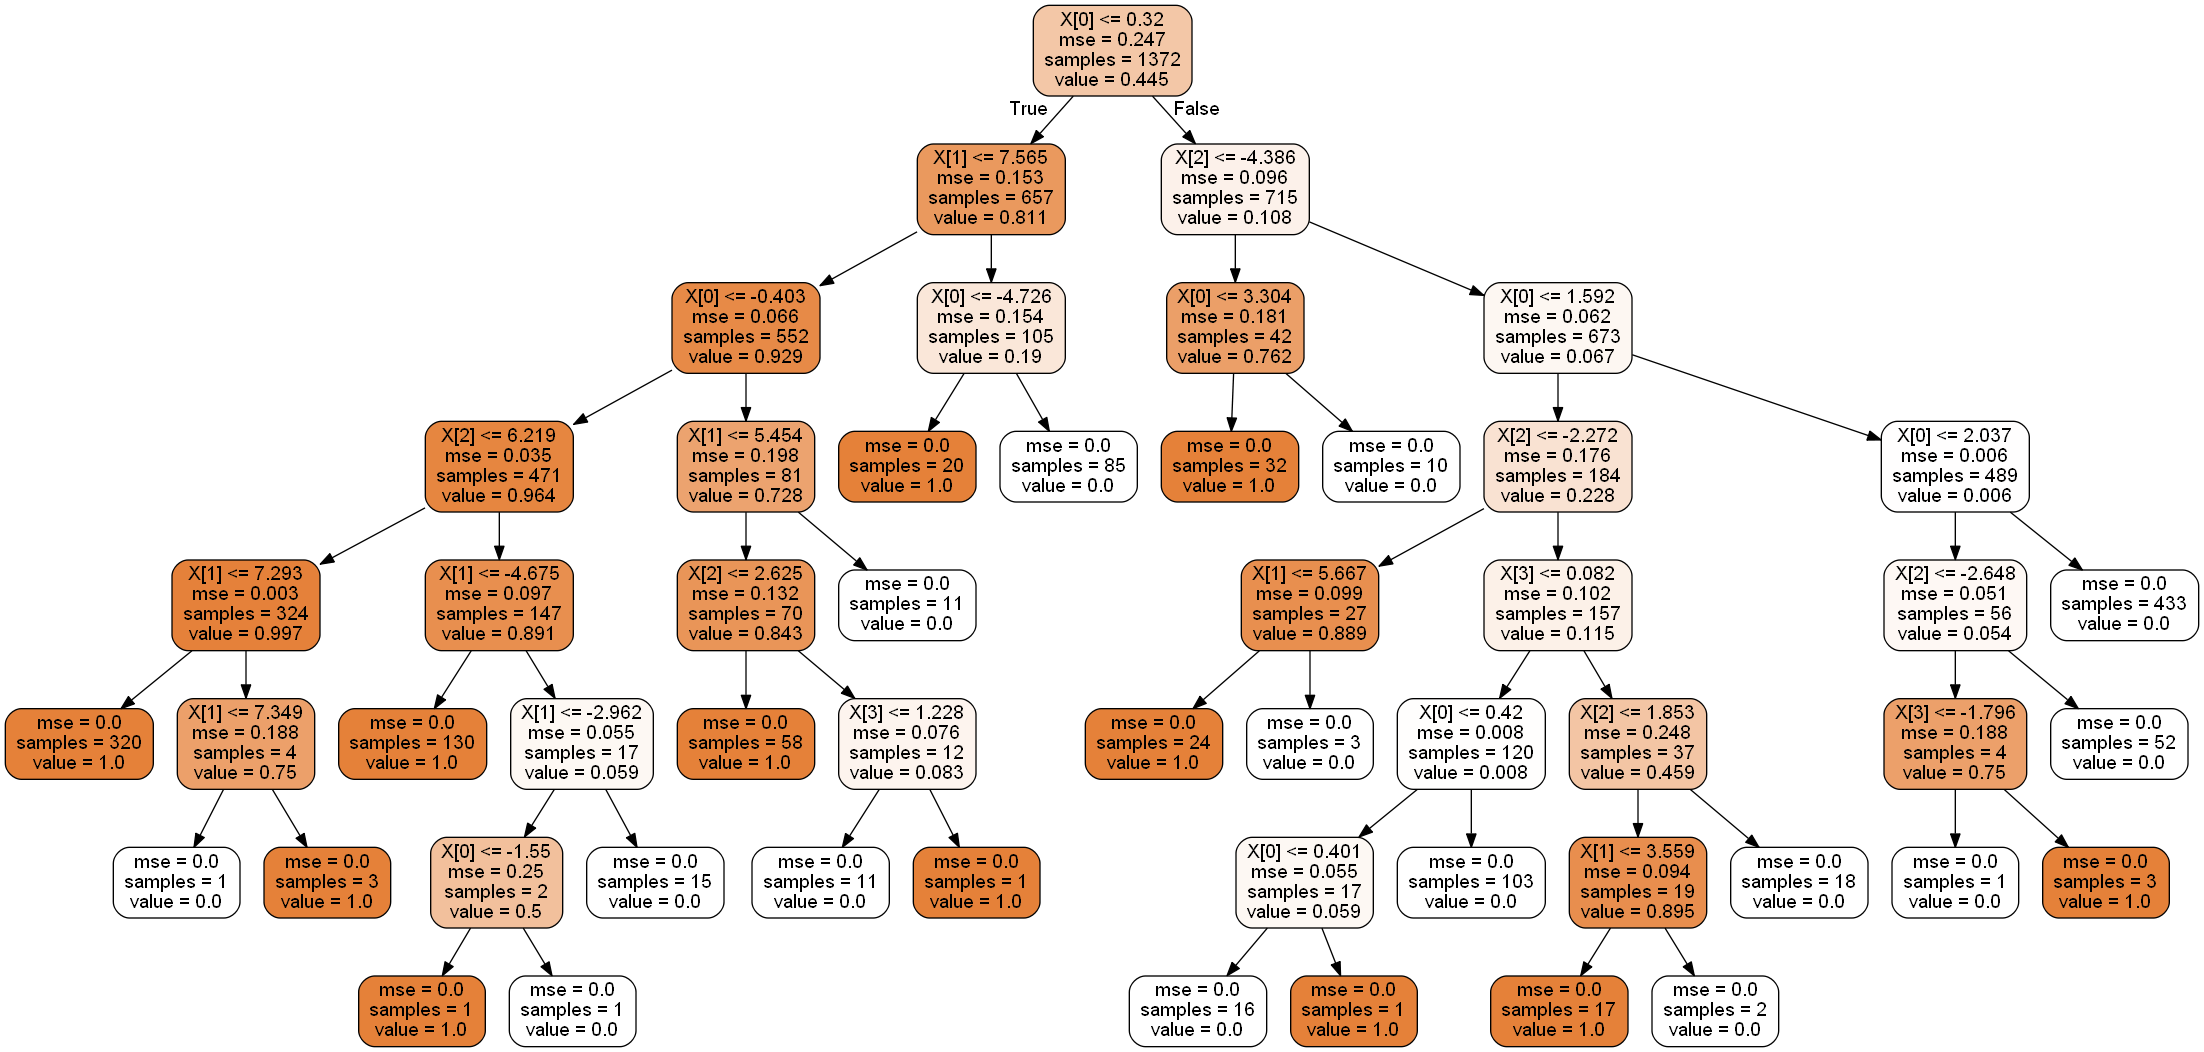

In [35]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from  pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = StringIO()
export_graphviz(dt,out_file=dot_data,
                filled = True,rounded = True,
                class_names=['0','1'])
graph = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
